In [1]:
import pandas as pd

In [2]:
data = pd.read_csv("../dataset/kc_tax.csv")
data.tail(10)

,TaxAssessedValue,SqFtTotLiving,ZipCode
498239,427000.0,2410,98056.0
498240,247000.0,990,98056.0
498241,247000.0,980,98056.0
498242,312000.0,1660,98056.0
498243,392000.0,2570,98056.0
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0
498248,286000.0,1310,98056.0


In [3]:
impuestos_filtrados = data.loc[(data.TaxAssessedValue<750_000) & (data.SqFtTotLiving>100)]
impuestos_filtrados

,TaxAssessedValue,SqFtTotLiving,ZipCode
1,206000.0,1870,98002.0
2,303000.0,1530,98166.0
3,361000.0,2000,98108.0
4,459000.0,3150,98108.0
5,223000.0,1570,98032.0
...,...,...,...
498244,375000.0,2230,98056.0
498245,316000.0,1710,98056.0
498246,340000.0,1930,98056.0
498247,132000.0,2930,98056.0


Text(0, 0.5, 'Tax-Assessed Value')

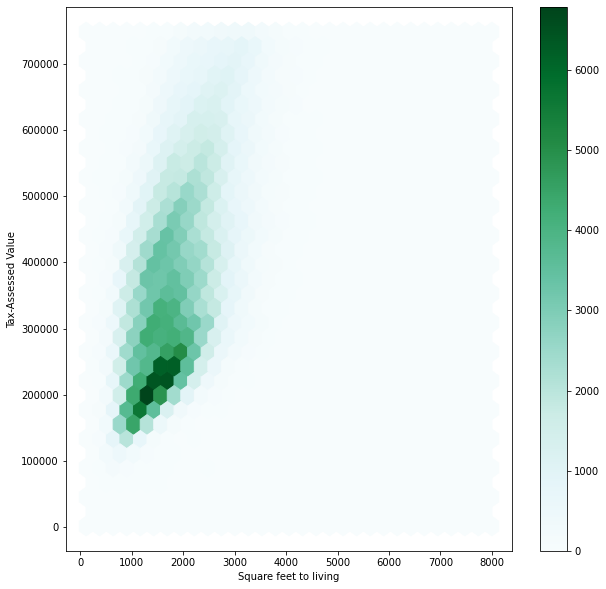

In [4]:
ax = impuestos_filtrados.plot.hexbin(x="SqFtTotLiving",y="TaxAssessedValue",gridsize=30,figsize=(10,10),sharex=False)

ax.set_xlabel("Square feet to living")
ax.set_ylabel("Tax-Assessed Value")

In [5]:
import seaborn as sns

Text(0, 0.5, 'Tax assessed value')

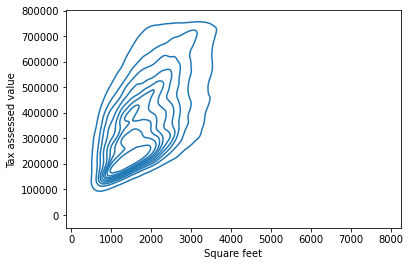

In [6]:
# Generar un contour plot
ax = sns.kdeplot(x=impuestos_filtrados.SqFtTotLiving,y=impuestos_filtrados.TaxAssessedValue)
ax.set_xlabel("Square feet")
ax.set_ylabel("Tax assessed value")

In [7]:
loans = pd.read_csv("../dataset/lc_loans.csv")

loans

,status,grade
0,Fully Paid,B
1,Charged Off,C
2,Fully Paid,C
3,Fully Paid,C
4,Current,B
...,...,...
450956,Current,D
450957,Current,D
450958,Current,D
450959,Current,D


In [12]:
crosstab = loans.pivot_table(index="grade",columns="status",aggfunc=lambda x:len(x),margins=True)
crosstab

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,1562,50051,20408,469,72490
B,5302,93852,31160,2056,132370
C,6023,88928,23147,2777,120875
D,5007,53281,13681,2308,74277
E,2842,24639,5949,1374,34804
F,1526,8444,2328,606,12904
G,409,1990,643,199,3241
All,22671,321185,97316,9789,450961


In [19]:
df = crosstab.loc["A":"G"].copy()
df.loc[:,"Charged Off":"Late"] = df.loc[:,"Charged Off":"Late"].div(df.All,axis=0)*100

df.All = df.All / sum(df.All)*100
df

status,Charged Off,Current,Fully Paid,Late,All
grade,,,,,
A,2.154780,69.045386,28.152849,0.646986,16.074561
B,4.005439,70.901262,23.540077,1.553222,29.352871
C,4.982834,73.570217,19.149535,2.297415,26.803870
D,6.740983,71.732838,18.418891,3.107288,16.470826
E,8.165728,70.793587,17.092863,3.947822,7.717741
F,11.825790,65.437074,18.040918,4.696218,2.861445
G,12.619562,61.400802,19.839556,6.140080,0.718687
